In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(purrr)
library(devtools)
library(ggbiplot)
library(corrplot)
library(caret)
library(FSelector)
library(pastecs)
library(stats)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: usethis

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following object is masked from 'package:purrr':

    compact


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: scales


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following objec

In [2]:
setwd("C:/Users/Park/namda_git/Datamining/term-project")
firedata <- read.csv(file = 'forestfires.csv', header = T, stringsAsFactors = F )

In [3]:
firedata
head(firedata)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0
8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [4]:
summary(firedata)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

In [5]:
sum(is.na(firedata))

[1] 0

In [6]:
sum(duplicated(firedata))

[1] 4

In [7]:
firedata <- unique(firedata)

86.2
90.2
91.6
92.9
96.2


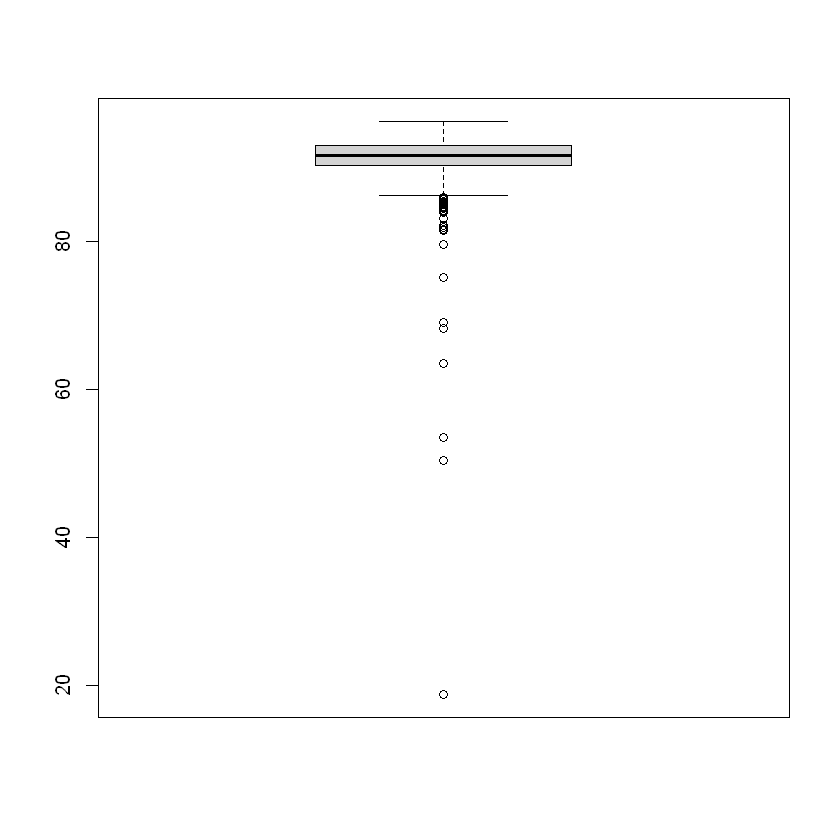

In [8]:
boxplot(firedata$FFMC)$stats

In [9]:
firedata[firedata$FFMC < 60, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
300,6,5,jun,sat,53.4,71.0,233.8,0.4,10.6,90,2.7,0,0
313,2,4,sep,sun,50.4,46.2,706.6,0.4,12.2,78,6.3,0,0
380,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0,0


In [10]:
firedata <- firedata[!(firedata$FFMC < 60), ]

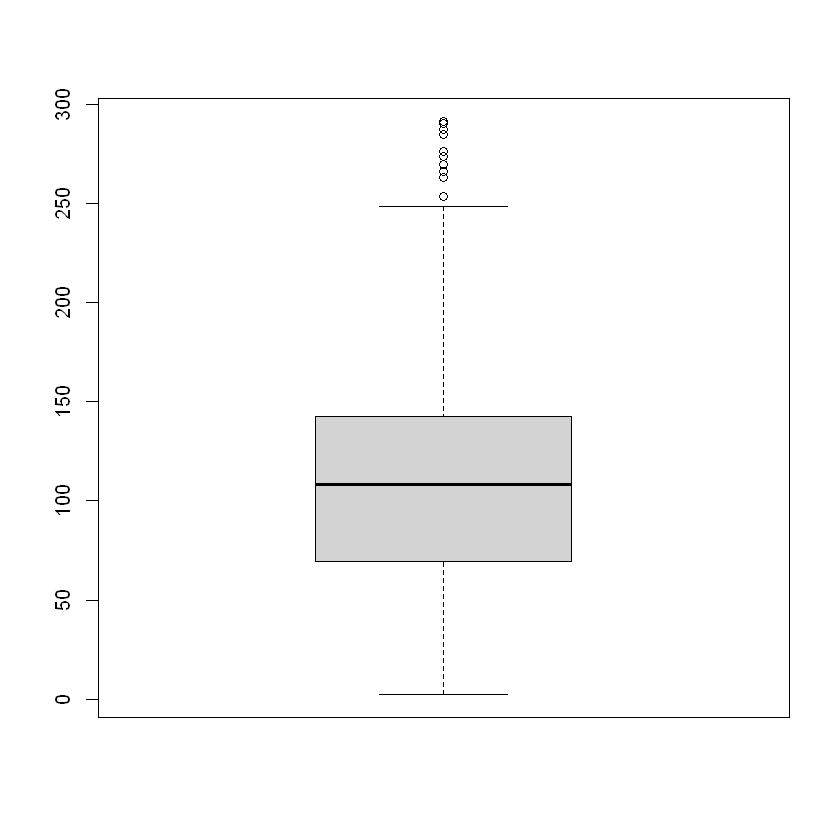

In [11]:
boxplot(firedata$DMC)

In [12]:
firedata[firedata$DMC > 280, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
375,6,5,sep,fri,90.3,290.0,855.3,7.4,10.3,78,4.0,0,18.30
407,6,5,sep,sat,87.1,291.3,860.6,4.0,17.0,67,4.9,0,3.95
409,4,3,sep,fri,90.3,290.0,855.3,7.4,19.9,44,3.1,0,7.80
431,7,4,sep,thu,89.7,287.2,849.3,6.8,19.4,45,3.6,0,0.00
441,5,4,sep,fri,90.3,290.0,855.3,7.4,16.2,58,3.6,0,0.00
445,2,5,sep,fri,90.3,290.0,855.3,7.4,16.2,58,3.6,0,9.96
449,7,4,sep,wed,89.7,284.9,844.0,10.1,10.5,77,4.0,0,0.00


In [13]:
firedata <- firedata[!(firedata$DMC > 280),]

34.0
439.3
661.8
709.9
825.1


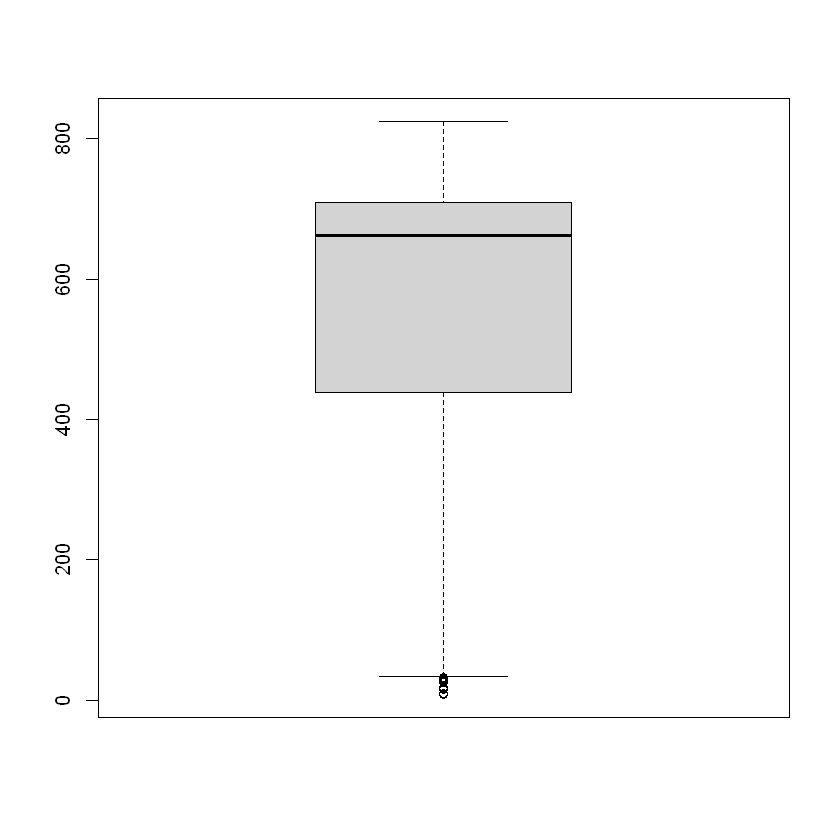

In [14]:
boxplot(firedata$DC)$stats

In [15]:
firedata[firedata$DC<20, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
98,3,4,mar,sat,69.0,2.4,15.5,0.7,17.4,24,5.4,0,0.00
105,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0,0.00
240,7,5,apr,sun,81.9,3.0,7.9,3.5,13.4,75,1.8,0,0.00
284,3,4,feb,wed,86.9,6.6,18.7,3.2,8.8,35,3.1,0,1.10
285,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0,24.24
464,6,5,feb,tue,75.1,4.4,16.2,1.9,4.6,82,6.3,0,5.39
465,6,4,feb,tue,75.1,4.4,16.2,1.9,5.1,77,5.4,0,2.14
466,2,2,feb,sat,79.5,3.6,15.3,1.8,4.6,59,0.9,0,6.84


In [17]:
firedata <- firedata[!(firedata$DC <20), ]

0.80
6.70
8.40
11.05
17.00


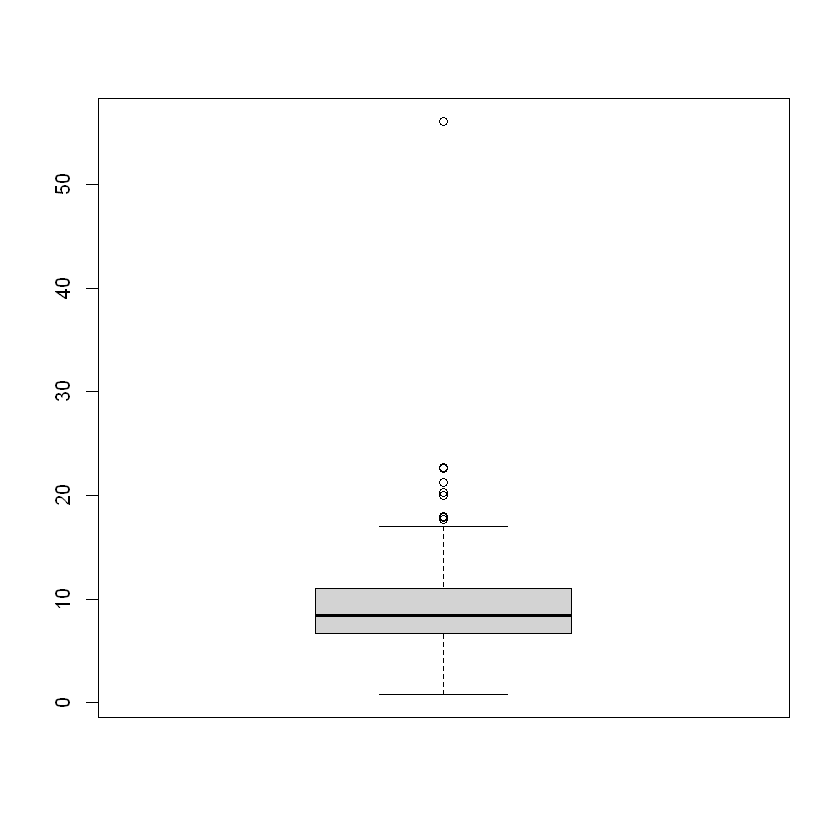

In [18]:
boxplot(firedata$ISI)$stats

In [19]:
firedata[firedata$ISI >20, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
12,7,5,sep,sat,92.8,73.2,713.0,22.6,19.3,38,4.0,0,0.00
23,7,4,jun,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0,0.00
25,7,4,aug,sat,93.5,139.4,594.2,20.3,23.7,32,5.8,0,0.00
136,3,5,aug,sat,93.5,139.4,594.2,20.3,17.6,52,5.8,0,0.00
207,2,2,aug,sat,93.5,139.4,594.2,20.3,22.9,31,7.2,0,15.45
212,7,4,aug,sat,93.5,139.4,594.2,20.3,5.1,96,5.8,0,26.00
267,6,5,aug,tue,94.3,131.7,607.1,22.7,19.4,55,4.0,0,0.17
486,2,4,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0,2.07


In [20]:
firedata <- firedata[!(firedata$ISI >20), ]

5.3
15.8
19.4
22.9
33.3


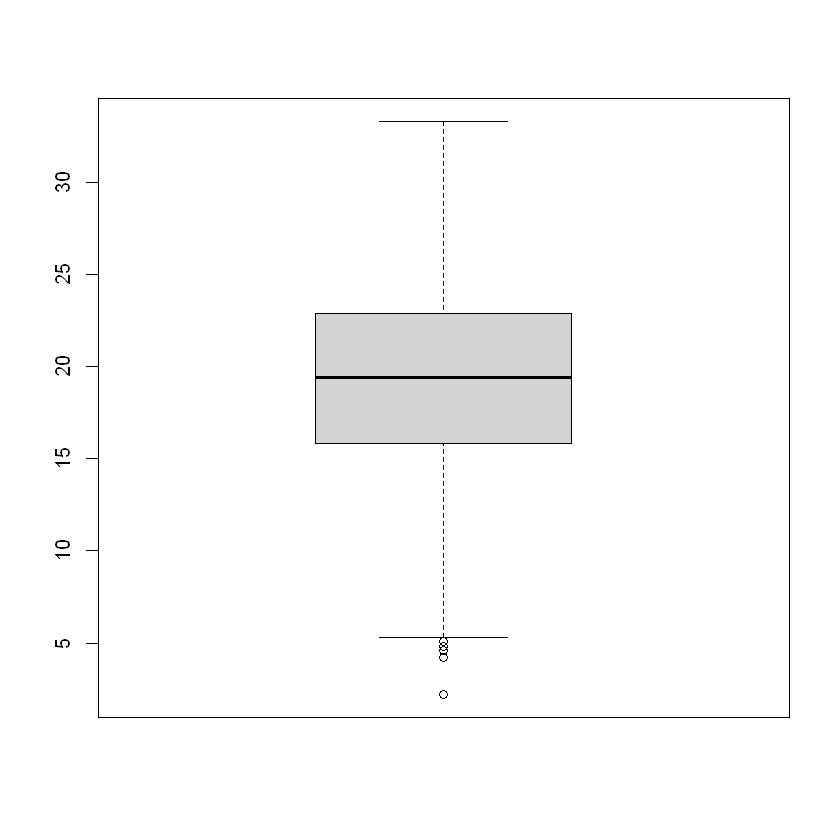

In [21]:
boxplot(firedata$temp)$stats

In [22]:
firedata[firedata$temp < 3, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
281,4,6,dec,fri,84.7,26.7,352.6,4.1,2.2,59,4.9,0,9.27


In [23]:
firedata <- firedata[!(firedata$temp < 3),]

[,1]
[1,]   15
[2,]   32
[3,]   41
[4,]   53
[5,]   84
attr(,"class")
        1 
"integer"

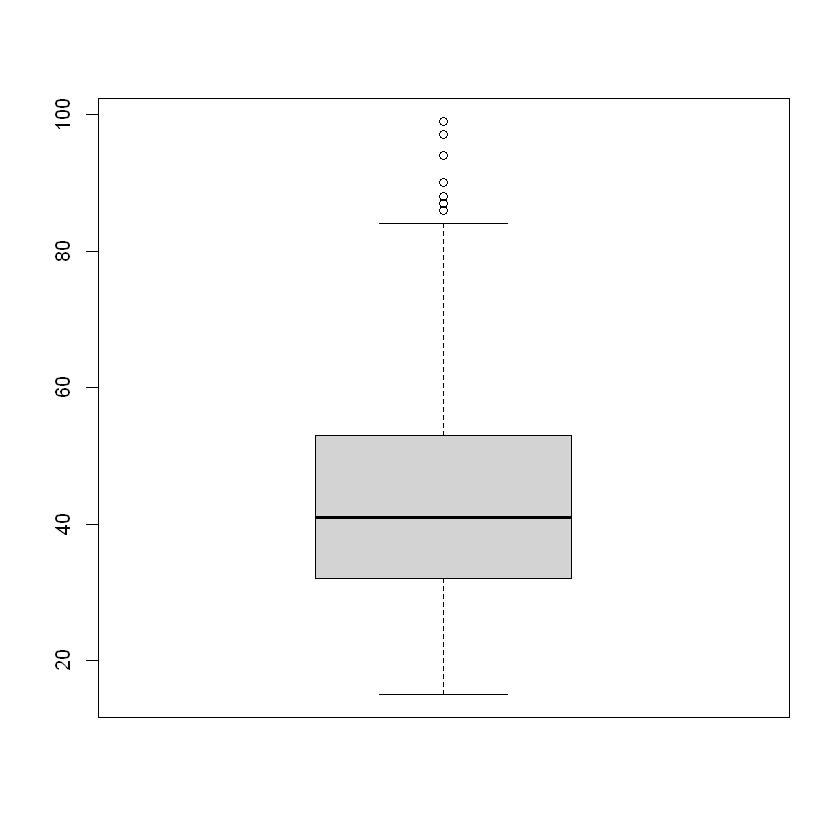

In [24]:
boxplot(firedata$RH)$stats

In [25]:
firedata[firedata$RH > 90, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
305,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0


In [26]:
firedata <- firedata[!(firedata$RH > 90), ]

0.4
2.7
4.0
4.9
8.0


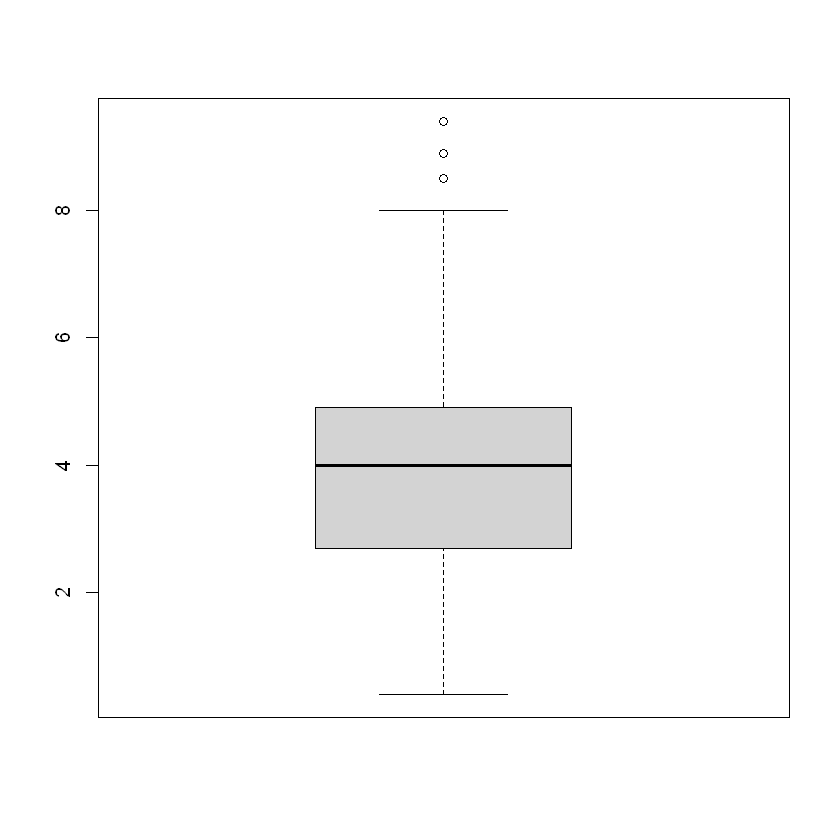

In [27]:
boxplot(firedata$wind)$stats

In [28]:
firedata[firedata$wind > 9, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
169,6,5,mar,fri,91.2,48.3,97.8,12.5,14.6,26,9.4,0,2.53
412,7,4,feb,fri,84.6,3.2,43.6,3.3,8.2,53,9.4,0,4.62
470,6,3,apr,sun,91.0,14.6,25.6,12.3,13.7,33,9.4,0,61.13
476,2,5,jun,thu,93.7,121.7,350.2,18.0,22.7,40,9.4,0,3.19


In [29]:
firedata <- firedata[!(firedata$wind > 9),]

0
0
0
0
0


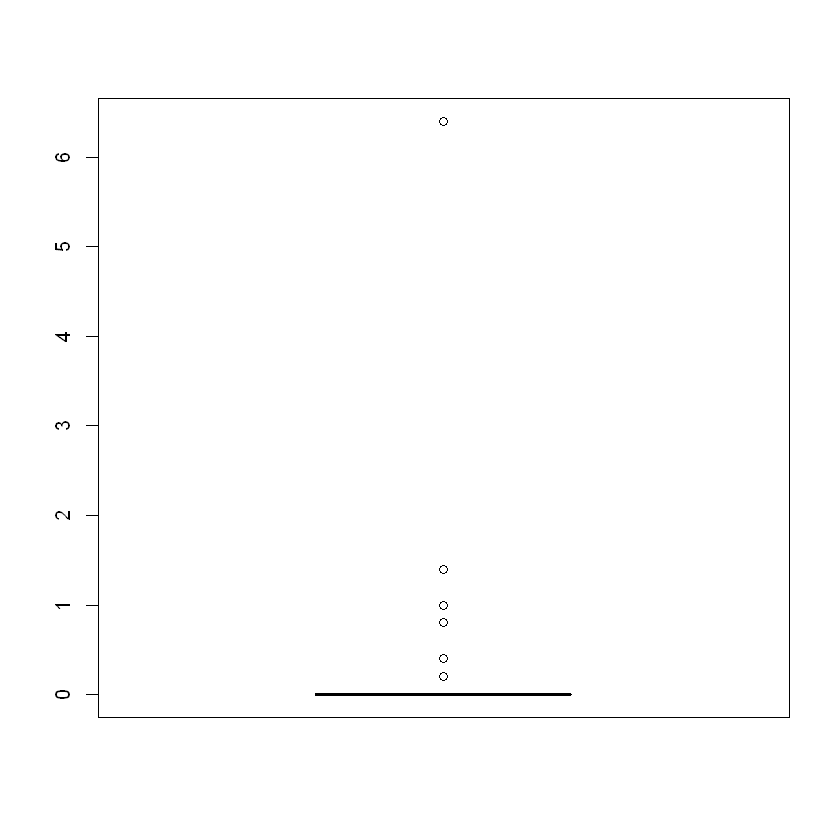

In [31]:
boxplot(firedata$rain)$stats

In [32]:
table(firedata$rain == 0)


FALSE  TRUE 
    7   472 

0.000
0.000
0.540
6.555
16.330


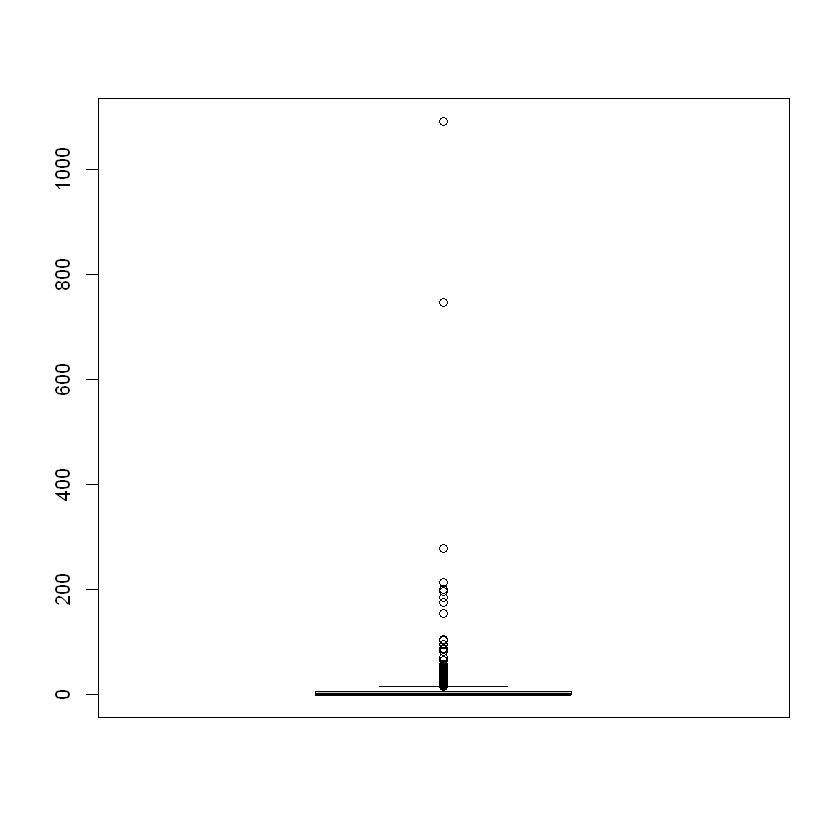

In [33]:
boxplot(firedata$area)$stats

In [34]:
firedata[firedata$area > 500, ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
239,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0,1090.84
416,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0,746.28


In [35]:
firedata <- firedata[!(firedata$area > 500), ]

In [36]:
str(firedata)

'data.frame':	477 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 7 7 6 ...
 $ Y    : int  5 4 4 6 6 6 6 5 5 5 ...
 $ month: chr  "mar" "oct" "oct" "aug" ...
 $ day  : chr  "fri" "tue" "sat" "sun" ...
 $ FFMC : num  86.2 90.6 90.6 92.3 92.3 91.5 91 92.5 92.5 63.5 ...
 $ DMC  : num  26.2 35.4 43.7 85.3 88.9 ...
 $ DC   : num  94.3 669.1 686.9 488 495.6 ...
 $ ISI  : num  5.1 6.7 6.7 14.7 8.5 10.7 7 7.1 7.1 0.8 ...
 $ temp : num  8.2 18 14.6 22.2 24.1 8 13.1 22.8 17.8 17 ...
 $ RH   : int  51 33 33 29 27 86 63 40 51 72 ...
 $ wind : num  6.7 0.9 1.3 5.4 3.1 2.2 5.4 4 7.2 6.7 ...
 $ rain : num  0 0 0 0 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [37]:
scaling_fun <- function (x) {

normalized = (x - min(x)) / (max(x) - min(x))
return (normalized)
}

In [41]:
data_scaled <- firedata

for(i in 5:12){
 data_scaled[i] <- scaling_fun(firedata[i])
}
str(data_scaled)


'data.frame':	477 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 7 7 6 ...
 $ Y    : int  5 4 4 6 6 6 6 5 5 5 ...
 $ month: chr  "mar" "oct" "oct" "aug" ...
 $ day  : chr  "fri" "tue" "sat" "sun" ...
 $ FFMC : num  0.694 0.829 0.829 0.881 0.881 ...
 $ DMC  : num  0.0849 0.1186 0.1489 0.3011 0.3143 ...
 $ DC   : num  0.0859 0.8049 0.8271 0.5784 0.5879 ...
 $ ISI  : num  0.224 0.307 0.307 0.724 0.401 ...
 $ temp : num  0.137 0.474 0.357 0.619 0.684 ...
 $ RH   : num  0.48 0.24 0.24 0.187 0.16 ...
 $ wind : num  0.7412 0.0588 0.1059 0.5882 0.3176 ...
 $ rain : num  0 0 0 0 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


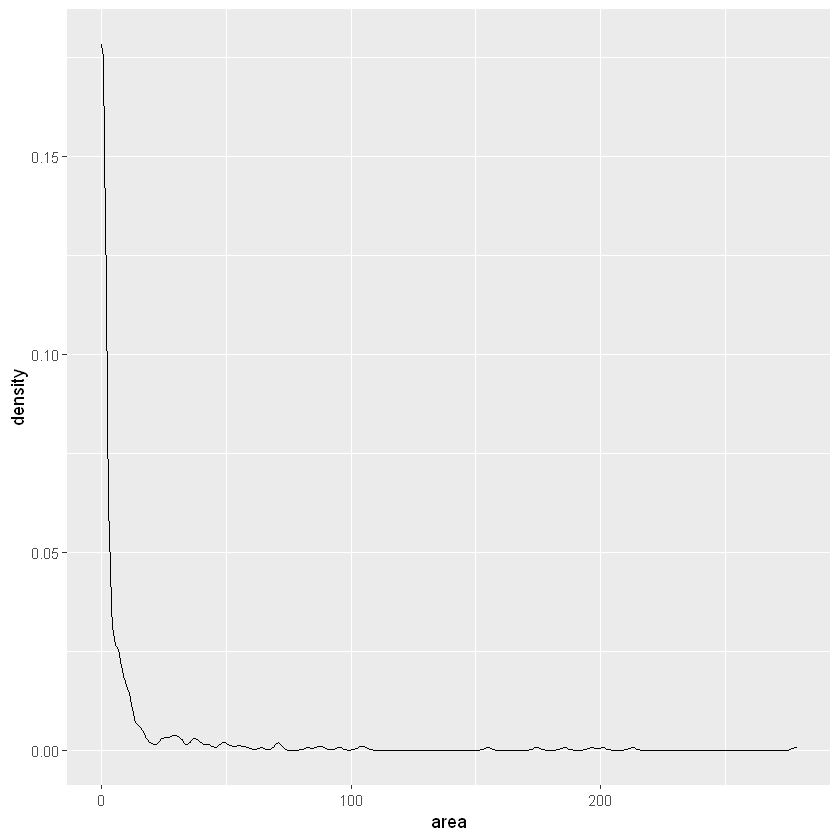

In [42]:
ggplot(data=data_scaled) + 
    geom_density(mapping= aes(x=area))

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,0.6941896,0.08488840,0.08592871,0.2239583,0.1374570,0.4800000,0.74117647,0,0
2,7,4,oct,tue,0.8287462,0.11855104,0.80487805,0.3072917,0.4742268,0.2400000,0.05882353,0,0
3,7,4,oct,sat,0.8287462,0.14892060,0.82714196,0.3072917,0.3573883,0.2400000,0.10588235,0,0
6,8,6,aug,sun,0.8807339,0.30113428,0.57836148,0.7239583,0.6185567,0.1866667,0.58823529,0,0
7,8,6,aug,mon,0.8807339,0.31430662,0.58786742,0.4010417,0.6838488,0.1600000,0.31764706,0,0
8,8,6,aug,mon,0.8562691,0.52103915,0.72870544,0.5156250,0.1305842,0.9466667,0.21176471,0,0
9,8,6,sep,tue,0.8409786,0.46286132,0.83427142,0.3229167,0.3058419,0.6400000,0.58823529,0,0
10,7,5,sep,sat,0.8868502,0.31101354,0.84177611,0.3281250,0.6391753,0.3333333,0.42352941,0,0
11,7,5,sep,sat,0.8868502,0.31101354,0.84177611,0.3281250,0.4673540,0.4800000,0.80000000,0,0


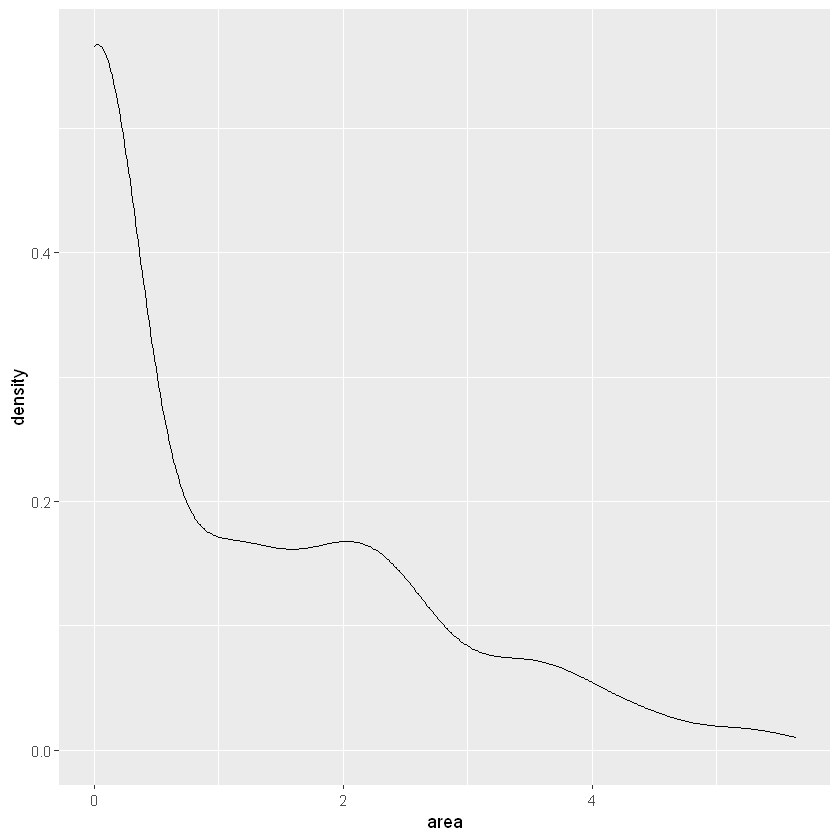

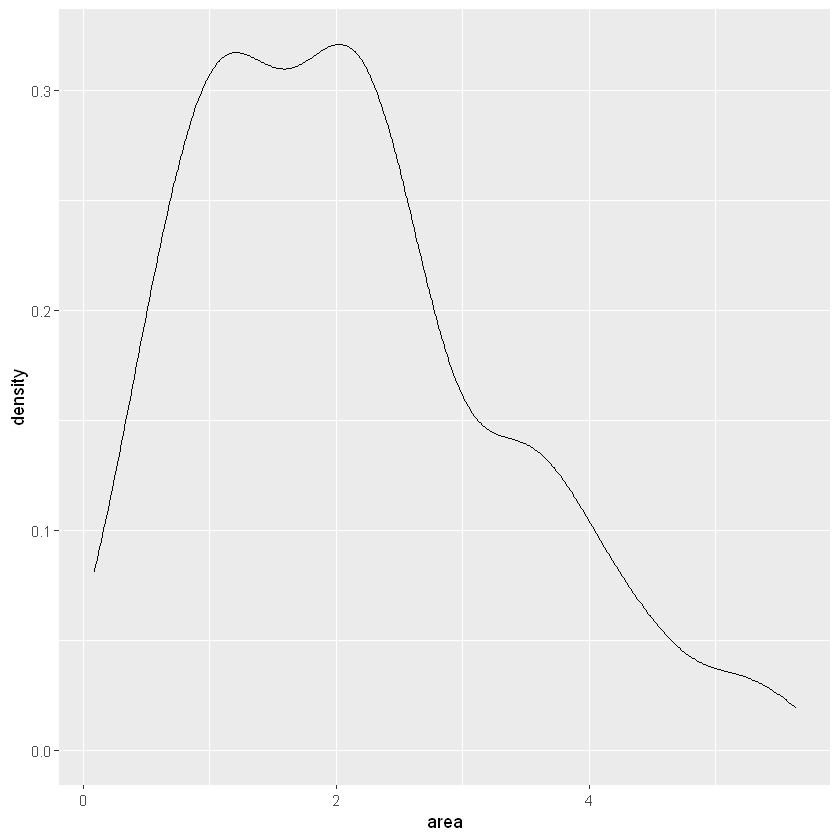

In [43]:
firedata_log <- transform(data_scaled, area= log(1+area))
firedata_log
ggplot(data=firedata_log) + 
    geom_density(mapping= aes(x=area))
firedata_log_nonzero <- firedata_log[!(firedata_log$area == 0),]
ggplot(data=firedata_log_nonzero) + 
    geom_density(mapping= aes(x=area))

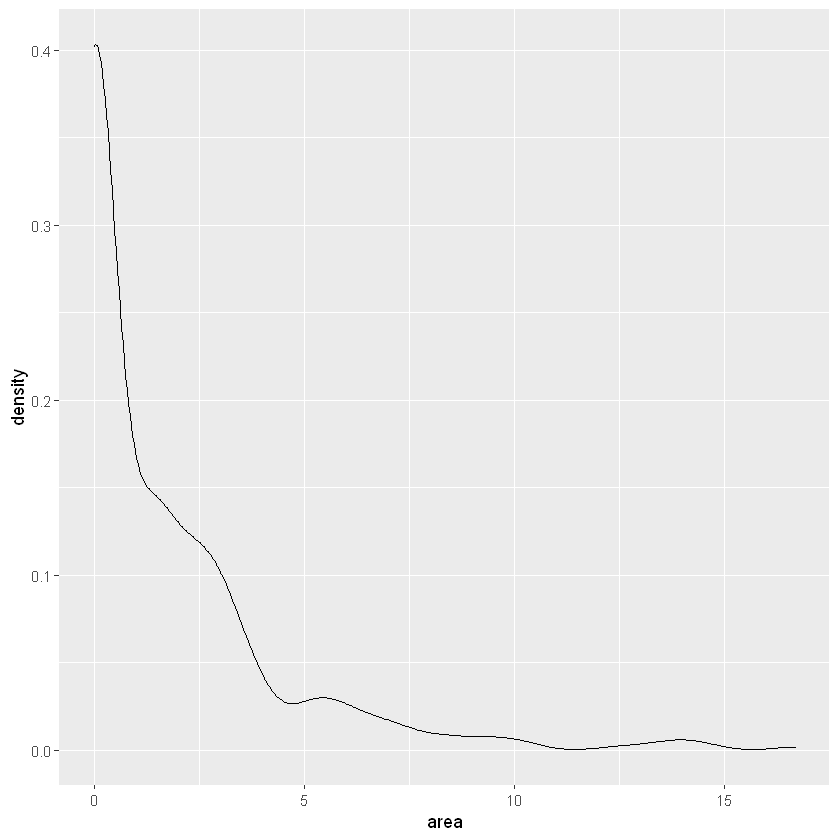

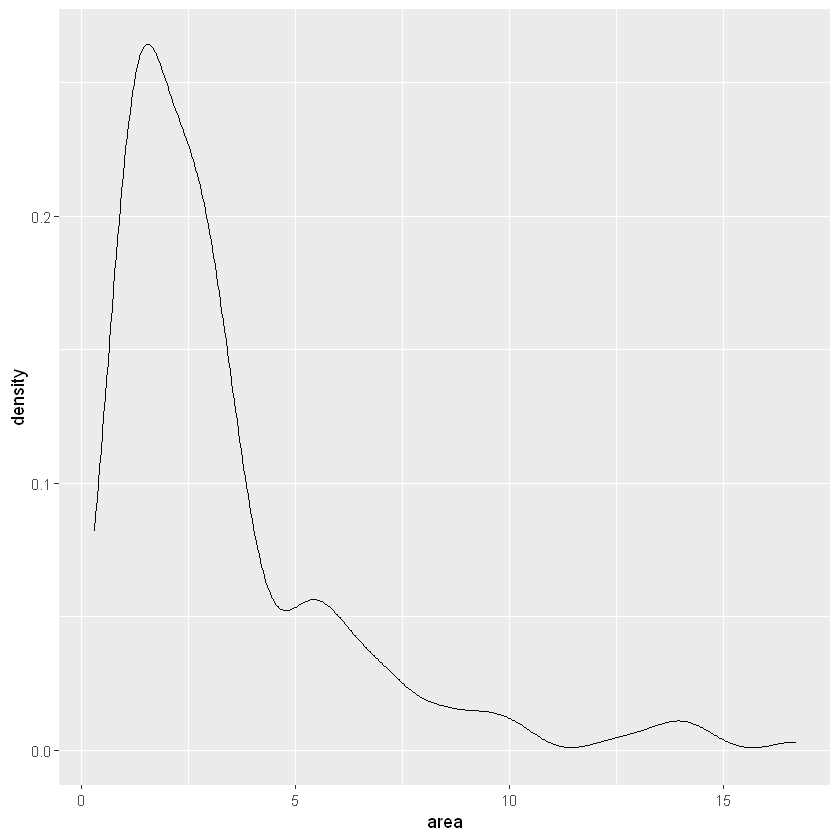

In [44]:
firedata_sqrt <- transform(data_scaled, area = sqrt(area))
ggplot(data=firedata_sqrt) + 
    geom_density(mapping= aes(x=area))
firedata_sqrt_nonzero <- firedata_sqrt[!(firedata_sqrt$area == 0),]
ggplot(data=firedata_sqrt_nonzero) + 
    geom_density(mapping= aes(x=area))

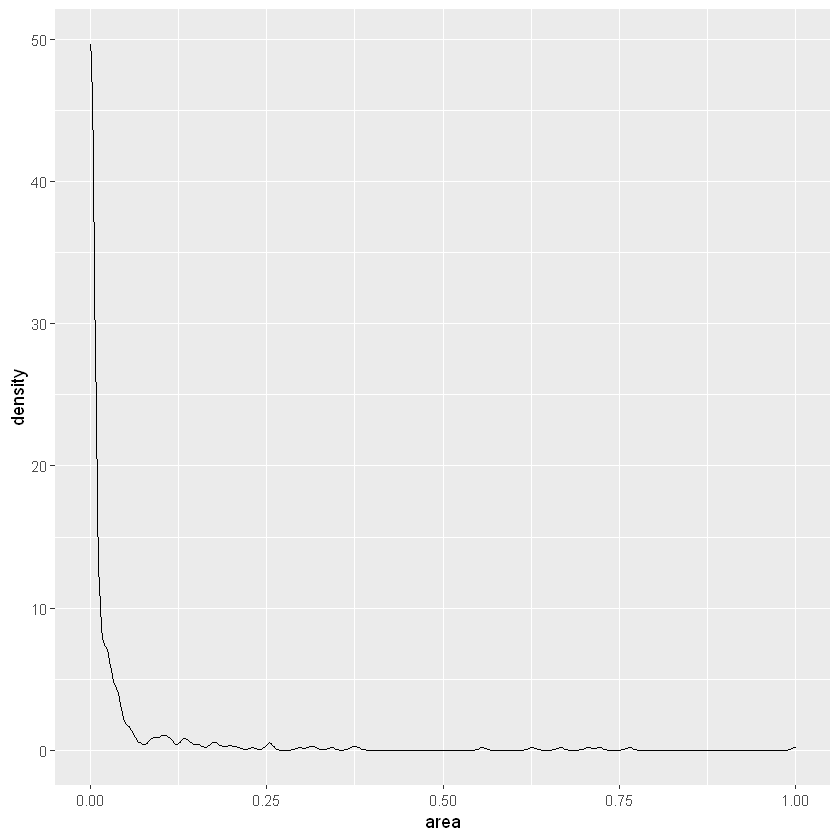

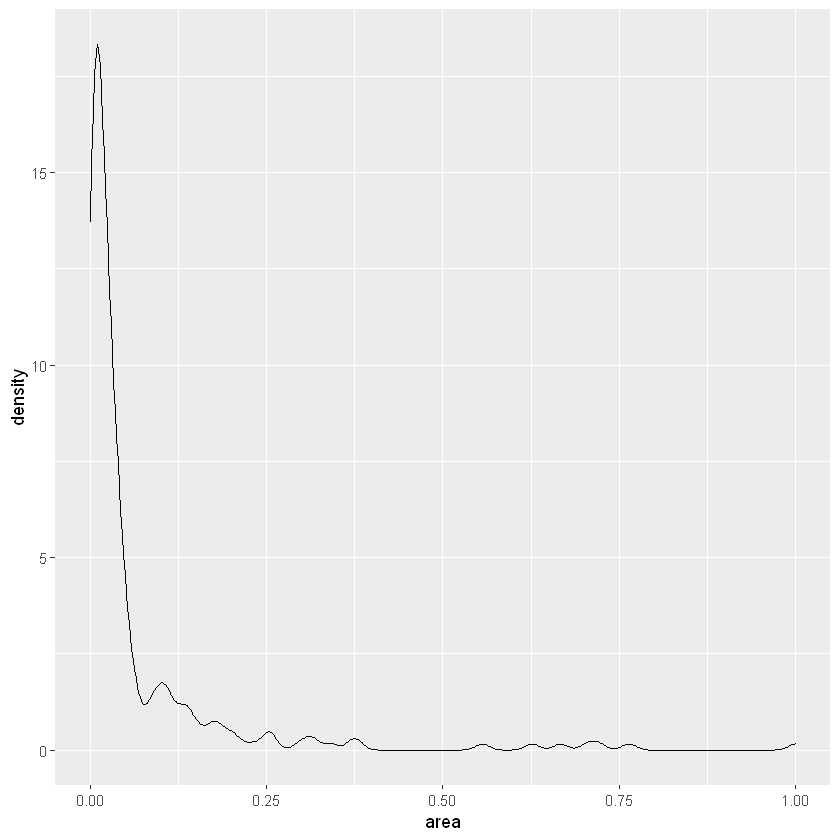

In [45]:
firedata_nomalized <- transform(data_scaled, area = scaling_fun(area))
firedata_nomalized_nonzero <- firedata_nomalized[!(firedata_nomalized$area ==0),]
ggplot(data=firedata_nomalized) + 
    geom_density(mapping= aes(x=area))
ggplot(data=firedata_nomalized_nonzero) + 
    geom_density(mapping= aes(x=area))

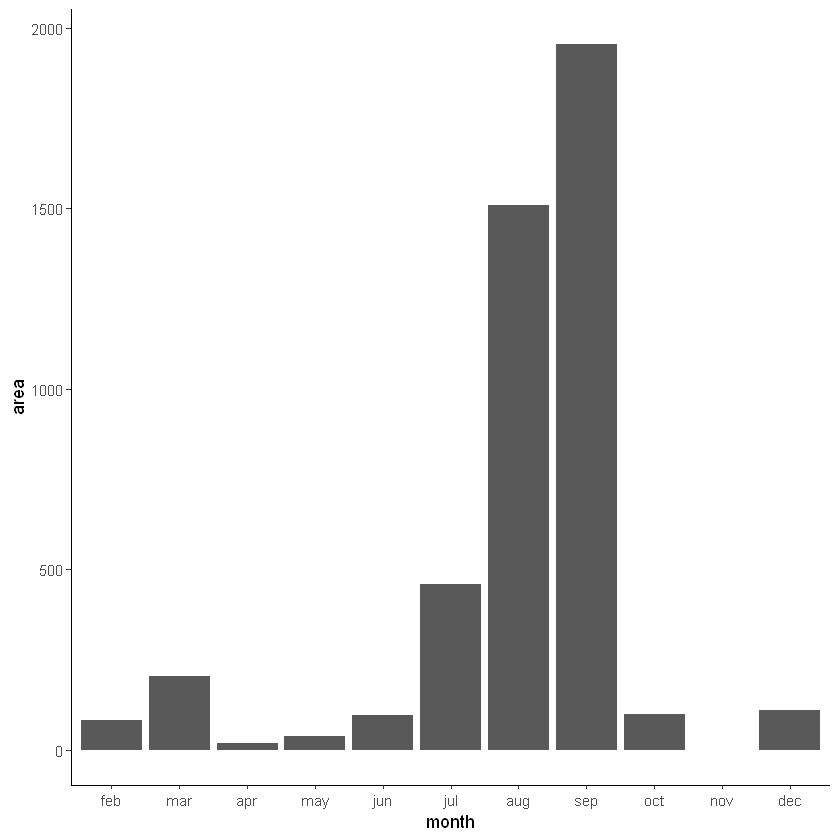

In [46]:
firedata_nomalized <- firedata <- firedata %>% mutate(month = factor(month, 
  levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")))
ggplot(data = firedata_nomalized) +
aes(x = month, y = area) +
geom_bar(stat = "identity") +
theme(panel.background = element_rect(fill = "white"), 
        axis.line = element_line(size = 0.25, colour = "black"))

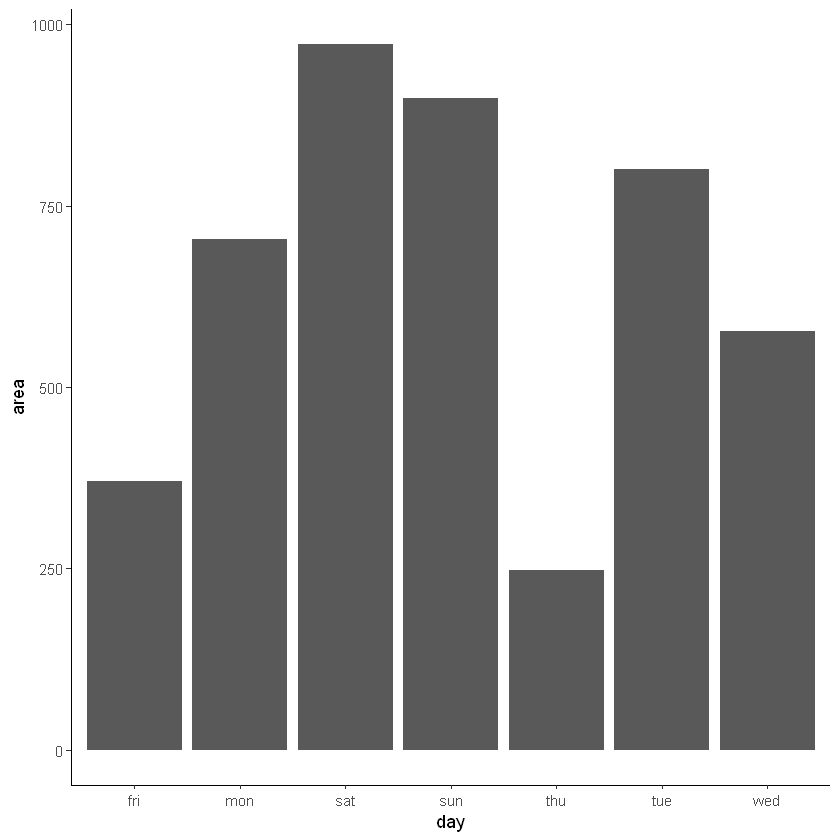

In [47]:
ggplot(data = firedata_nomalized) +
aes(x = day, y = area) +
geom_bar(stat = "identity") +
theme(panel.background = element_rect(fill = "white"), 
        axis.line = element_line(size = 0.25, colour = "black"))

In [56]:
firedata_log

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,0.6941896,0.08488840,0.08592871,0.2239583,0.1374570,0.4800000,0.74117647,0,0
2,7,4,oct,tue,0.8287462,0.11855104,0.80487805,0.3072917,0.4742268,0.2400000,0.05882353,0,0
3,7,4,oct,sat,0.8287462,0.14892060,0.82714196,0.3072917,0.3573883,0.2400000,0.10588235,0,0
6,8,6,aug,sun,0.8807339,0.30113428,0.57836148,0.7239583,0.6185567,0.1866667,0.58823529,0,0
7,8,6,aug,mon,0.8807339,0.31430662,0.58786742,0.4010417,0.6838488,0.1600000,0.31764706,0,0
8,8,6,aug,mon,0.8562691,0.52103915,0.72870544,0.5156250,0.1305842,0.9466667,0.21176471,0,0
9,8,6,sep,tue,0.8409786,0.46286132,0.83427142,0.3229167,0.3058419,0.6400000,0.58823529,0,0
10,7,5,sep,sat,0.8868502,0.31101354,0.84177611,0.3281250,0.6391753,0.3333333,0.42352941,0,0
11,7,5,sep,sat,0.8868502,0.31101354,0.84177611,0.3281250,0.4673540,0.4800000,0.80000000,0,0


In [57]:
data_scaled[13] <- scaling_fun(firedata[13])

In [58]:
write.csv(firedata_log, "firedata_log.csv")

In [59]:
write.csv(firedata_nomalized, "firedata_nomalized.csv")

In [60]:
write.csv(firedata_sqrt, "firedata_sqrt.csv")

In [62]:
write.csv(data_scaled, "scaled_firedata.csv")

In [75]:
getwd()

[1] "C:/Users/Park/namda_git/Datamining/term-project"